In [7]:
import os, yaml, sys
import cv2
import numpy as np
from retinaface import RetinaFace
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from image_processing.utils import read_video


In [2]:

# Load image
img_path = "/Users/tizianocausin/Downloads/Causin_Tiziano_photo.jpeg"
img = cv2.imread(img_path)

# Run RetinaFace detection
detections = RetinaFace.detect_faces(img_path)

# Create a blank mask
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Loop over all detected faces
for key in detections.keys():
    face = detections[key]
    facial_area = face["facial_area"]  # [x1, y1, x2, y2]
    x1, y1, x2, y2 = facial_area
#     cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)  # fill the face area

# # Apply the mask to keep only face pixels
# face_pixels = cv2.bitwise_and(img, img, mask=mask)

# # Show or save the result

In [4]:
detections

{'face_1': {'score': np.float64(0.9988999366760254),
  'facial_area': [np.int64(1107),
   np.int64(1006),
   np.int64(1990),
   np.int64(2178)],
  'landmarks': {'right_eye': [np.float32(1338.3333), np.float32(1404.009)],
   'left_eye': [np.float32(1773.9015), np.float32(1423.4323)],
   'nose': [np.float32(1553.5507), np.float32(1662.6631)],
   'mouth_right': [np.float32(1342.0918), np.float32(1825.7145)],
   'mouth_left': [np.float32(1750.132), np.float32(1843.4395)]}}}

In [5]:
width = x2 - x1
height = y2 - y1
area = width * height

In [6]:
scale = 1.4  # +20%

new_width  = width * scale
new_height = height * scale
cx = (x1 + x2) / 2
cy = (y1 + y2) / 2
x1_new = int(cx - new_width / 2)
x2_new = int(cx + new_width / 2)
y1_new = int(cy - new_height / 2)
y2_new = int(cy + new_height / 2)

In [7]:
# points = np.array([
#     [x1, y1],  # top-left
#     [x2, y1],  # top-right
#     [x2, y2],  # bottom-right
#     [x1, y2],  # bottom-left
#     [x1, y1]   # close the rectangle
# ])
points = np.array([
    [x1_new, y1_new],  # top-left
    [x2_new, y1_new],  # top-right
    [x2_new, y2_new],  # bottom-right
    [x1_new, y2_new],  # bottom-left
    [x1_new, y1_new]   # close the rectangle
])

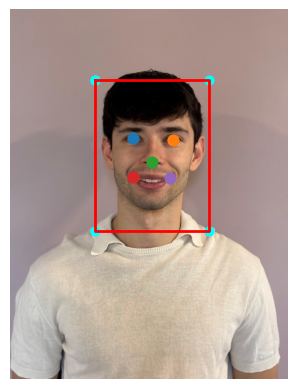

In [8]:
plt.imshow(img[:,:,::-1])
plt.axis("off")

# Plot rectangle points and outline
plt.plot(points[:, 0], points[:, 1], 'r-', linewidth=2)   # red rectangle outline
plt.scatter(points[:, 0], points[:, 1], c='cyan', s=40)   # cyan corner points
landmarks = detections['face_1']['landmarks']
for name, (x, y) in landmarks.items():
    plt.scatter(x, y, s=60, marker='o', label=name)
    # plt.text(x + 10, y - 10, name, color='yellow', fontsize=10, weight='bold')

plt.show()

In [3]:
v = read_video(paths, 1, "rubin_to_venus.mp4")

11:24:44 - rank 1 rubin_to_venus.mp4 read successfully


In [10]:
for i in range(v.shape[0]):
    # Run RetinaFace detection
    detections_vid = RetinaFace.detect_faces(v[i,:,:,:])
    # Create a blank mask
    try:
        face = detections_vid[key]
        x1, y1, x2, y2 = detections_vid['face_1']['facial_area']
        points = np.array([
            [x1, y1],  # top-left
            [x2, y1],  # top-right
            [x2, y2],  # bottom-right
            [x1, y2],  # bottom-left
            [x1, y1]   # close the rectangle
        ])
        plt.imshow(v[i,:,:,:])
        plt.plot(points[:, 0], points[:, 1], 'r-', linewidth=2)
        plt.show()
        clear_output(wait=True)
    except KeyError:
        print("no face found here")
        plt.imshow(v[i,:,:,:])
        plt.show()
        clear_output(wait=True)


KeyboardInterrupt: 

In [5]:
detections_vid = RetinaFace.detect_faces(v[100,:,:,:])

In [6]:
print(detections_vid)

{'face_1': {'score': np.float64(0.9995439648628235), 'facial_area': [np.int64(719), np.int64(168), np.int64(1001), np.int64(558)], 'landmarks': {'right_eye': [np.float32(774.48956), np.float32(310.72995)], 'left_eye': [np.float32(900.9388), np.float32(319.3589)], 'nose': [np.float32(807.7766), np.float32(379.25018)], 'mouth_right': [np.float32(771.8297), np.float32(457.42944)], 'mouth_left': [np.float32(870.0352), np.float32(464.98227)]}}}


In [18]:
points = np.array([
    [x1, y1],  # top-left
    [x2, y1],  # top-right
    [x2, y2],  # bottom-right
    [x1, y2],  # bottom-left
    [x1, y1]   # close the rectangle
])

NameError: name 'x1' is not defined

In [19]:
face

NameError: name 'face' is not defined

In [20]:
landmarks = detections_vid['face_1']['landmarks']

KeyError: 'face_1'

NameError: name 'points' is not defined

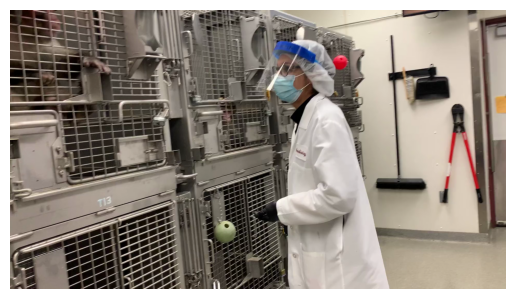

In [21]:
plt.imshow(v[0,:,:,:])
plt.axis("off")

# Plot rectangle points and outline
plt.plot(points[:, 0], points[:, 1], 'r-', linewidth=2)   # red rectangle outline
plt.scatter(points[:, 0], points[:, 1], c='cyan', s=40)   # cyan corner points

for name, (x, y) in landmarks.items():
    plt.scatter(x, y, s=60, marker='o', label=name)
    # plt.text(x + 10, y - 10, name, color='yellow', fontsize=10, weight='bold')

plt.show()